In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate
from thinkdsp import read_wave
from thinkdsp import Wave

In [2]:
def iterpink(depth):
    values = np.random.randn(depth)
    smooth = np.random.randn(depth)
    source = np.random.randn(depth)
    sumvals = values.sum()
    i = 0
    while True:
        yield sumvals + smooth[i]
        i += 1
        if i == depth:
            i = 0
            smooth = np.random.randn(depth)
            source = np.random.randn(depth)
            continue
        c = 0
        while not (i >> c) & 1:
            c += 1
        sumvals += source[i] - values[c]
        values[c] = source[i]

In [3]:
def pink_noise(points, depth=16):
    a = []
    s = iterpink(depth)
    for n in range(points):
        a.append(next(s))
    return np.array(a)

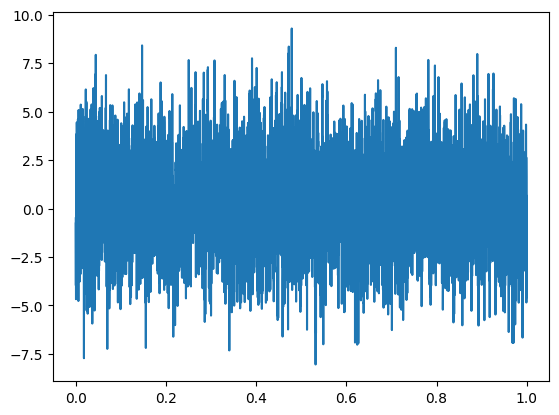

In [4]:
ys = pink_noise(11025,16)
wave = Wave(ys)
wave.plot()

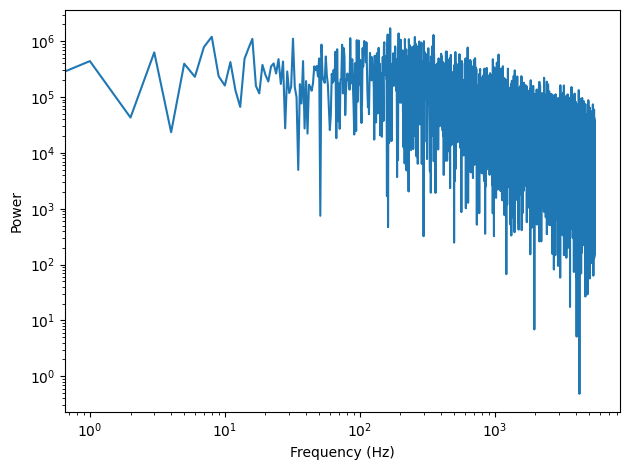

In [5]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)
wave.make_audio()